In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/University/Projecto_integrador_1/Taller2

/content/drive/MyDrive/University/Projecto_integrador_1/Taller2


In [3]:
data_path= '/content/drive/MyDrive/University/Projecto_integrador_1/Taller2/Data/cats_vs_dogs_small'

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image # to load images
from IPython.display import display # to display images
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
print(tf.keras.__version__)
print(tf.__version__)

2.8.0
2.8.2


In [6]:
set_name = 'train'
class_name = "dog"
file_name = 'dog.1.jpg'
file_path = os.path.join(data_path,set_name,class_name,file_name)
print(file_path)

/content/drive/MyDrive/University/Projecto_integrador_1/Taller2/Data/cats_vs_dogs_small/train/dog/dog.1.jpg


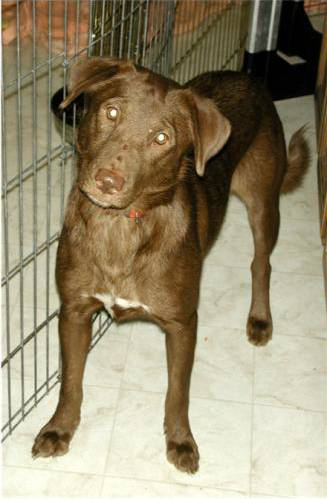

(499, 327, 3)


In [7]:
img = Image.open(file_path)
display(img)
img_array = np.array(img)
print(img_array.shape)

In [8]:
training_path = os.path.join(data_path,'train')
training_set = image_dataset_from_directory(training_path,
shuffle=True,
batch_size=32,
image_size=(150, 150),
validation_split = 0.2,
subset = 'training',
seed = 1234,
)
validation_set = image_dataset_from_directory(training_path,
shuffle=True,
batch_size=32,
image_size=(150, 150),
validation_split = 0.2,
subset = 'validation',
seed = 1234,
)

Found 1066 files belonging to 2 classes.
Using 853 files for training.
Found 1066 files belonging to 2 classes.
Using 213 files for validation.


In [9]:
training_set.class_names

['cat', 'dog']

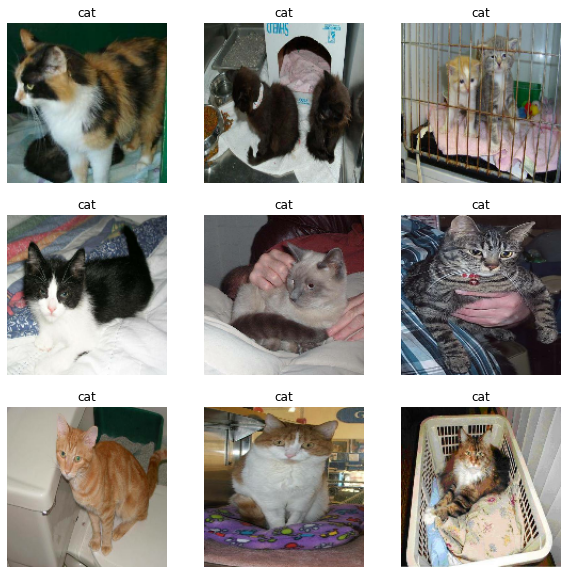

In [10]:
class_names = training_set.class_names
plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
base_model = keras.applications.MobileNet(
weights = 'imagenet',
input_shape = (150,150,3),
include_top = False,
)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [12]:
inputs = keras.Input(shape = (150,150,3))
x = tf.keras.applications.xception.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs,outputs)

In [13]:
model.compile(optimizer='adam', loss =
tf.keras.losses.BinaryCrossentropy(from_logits = True),metrics =
keras.metrics.BinaryAccuracy())
model.fit(training_set, epochs = 20, validation_data = validation_set)

Epoch 1/20
27/27 [==============================] - 47s 1s/step - loss: 0.3137 - binary_accuracy: 0.9437 - val_loss: 0.3115 - val_binary_accuracy: 0.9155
Epoch 2/20
27/27 [==============================] - 3s 89ms/step - loss: 0.2218 - binary_accuracy: 0.9437 - val_loss: 0.3086 - val_binary_accuracy: 0.9155
Epoch 3/20
27/27 [==============================] - 3s 90ms/step - loss: 0.2184 - binary_accuracy: 0.9437 - val_loss: 0.2964 - val_binary_accuracy: 0.9155
Epoch 4/20
27/27 [==============================] - 3s 89ms/step - loss: 0.2176 - binary_accuracy: 0.9437 - val_loss: 0.2941 - val_binary_accuracy: 0.9155
Epoch 5/20
27/27 [==============================] - 3s 89ms/step - loss: 0.2166 - binary_accuracy: 0.9437 - val_loss: 0.2965 - val_binary_accuracy: 0.9155
Epoch 6/20
27/27 [==============================] - 3s 89ms/step - loss: 0.2164 - binary_accuracy: 0.9437 - val_loss: 0.2964 - val_binary_accuracy: 0.9155
Epoch 7/20
27/27 [==============================] - 3s 89ms/step - loss

In [14]:
json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
  json_file.write(json_config)
model.save_weights('pets_xception_transferlearning.h5')